# Mount Drive for Saving

In [0]:
from google.colab import drive
drive.mount('/content/drive')

# Download Data

Data is download from the source provided at:

Food-101 – Mining Discriminative Components with Random Forests

Lukas Bossard, Matthieu Guillaumin, Luc Van Gool

https://www.vision.ee.ethz.ch/datasets_extra/food-101/

In [2]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2019-07-29 22:33:15--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2019-07-29 22:33:15--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  23.7MB/s    in 3m 50s  

2019-07-29 22:37:06 (20.7 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



Extract the files

In [0]:
!tar xzf food-101.tar.gz


## Code Imports

In [0]:
# Add repo path to allow for importing custom functions while working on google colab
repo_path = './drive/My Drive/FoodID'
sys.path.append(repo_path)

In [0]:
from functions import *

# Defining Image Generators

In [5]:
img_path = './food-101/images/'
meta_path = './food-101/meta'

df_train = file_path_dataframe(os.path.join(meta_path, 'train.json'))
df_test = file_path_dataframe(os.path.join(meta_path, 'test.json'))

# Check that there are 75,750 training images and 25,250 testing images
print(df_train.shape, df_test.shape)

(75750, 2) (25250, 2)


In [0]:
# Take a peak to make sure the dataframes are correct
df_train.head()

,class,filename
0,churros,churros/1004234.jpg
1,churros,churros/1013460.jpg
2,churros,churros/1016791.jpg
3,churros,churros/102100.jpg
4,churros,churros/1025494.jpg


In [0]:
# Check to see that each class in the training has 750 instances and each class in testing has #250

train_class = df_train['class'].value_counts()
print(train_class.min(), train_class.max())

test_class = df_test['class'].value_counts()
print(test_class.min(), test_class.max())


750 750
250 250


ImageDataGenerator is a great keras tool that allows us to define a pipeline for importing images (either based on a dataframe or a directory structure) without having to import and manipulate all of the images at one time.

It also allows us to manipulate the images.  In this case, we are applying random shifts of 10% of the image width and height and rotating images by up to 30 degrees in the training set.  This allows the model to become smarter by giving it images that differ in more ways. 

We also apply a rescaling by dividing the values of the image by 255 (2^8 - 1).  This produces values that range from 0 to 1.  This rescaling helps with the model and also puts the data in a format that our graphing function (imshow) can use.

In [8]:
# create image generator and generator training and test

train_datagen = ImageDataGenerator(rescale=1./255,
                                     width_shift_range=0.1, 
                                     height_shift_range=0.1, 
                                     rotation_range=30, 
                                     horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

data_train = train_datagen.flow_from_dataframe(
    dataframe=df_train, 
    directory='./food-101/images/', 
    x_col= 'filename', 
    y_col='class', 
    target_size=(224, 224), 
    color_mode='rgb', 
    #classes=None, 
    class_mode='categorical', 
    batch_size=101, 
    shuffle=True, 
    seed=42, 
    )


data_test = test_datagen.flow_from_dataframe(
    dataframe=df_test, 
    directory='./food-101/images/', 
    x_col='filename', 
    y_col='class', 
    target_size=(224, 224), 
    color_mode='rgb', 
    #classes=None, 
    class_mode='categorical', 
    batch_size=101, 
    shuffle=True, 
    seed=42, 
    )


Found 75750 validated image filenames belonging to 101 classes.
Found 25250 validated image filenames belonging to 101 classes.


The class labels are provided for us in the labels.txt file.  There are several options for bringing in a text file, but numpy provides a relatively straightforward solution.  However, we must specify that the data type is a string and that the items are delimited by a new line.

In [21]:
labels = np.loadtxt(os.path.join(meta_path, 'labels.txt'), dtype=str, delimiter='\n')

# Take a gander at the beginning and end of the list.
print('{} different classes'.format(len(labels)))
print(labels[:10])
print('...')
print(labels[-10:])

101 different classes
['Apple pie' 'Baby back ribs' 'Baklava' 'Beef carpaccio' 'Beef tartare'
 'Beet salad' 'Beignets' 'Bibimbap' 'Bread pudding' 'Breakfast burrito']
...
['Spaghetti carbonara' 'Spring rolls' 'Steak' 'Strawberry shortcake'
 'Sushi' 'Tacos' 'Takoyaki' 'Tiramisu' 'Tuna tartare' 'Waffles']


# Random Forest Classifier

https://medium.com/machine-learning-world/feature-extraction-and-similar-image-search-with-opencv-for-newbies-3c59796bf774

In [0]:

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedShuffleSplit

In [0]:
rf_train_images[0].shape

(150528,)

In [0]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(rf_train_images, rf_train_labels)

rf_model.score(rf_test_images, rf_test_labels)

0.033663366336633666

In [0]:
# i = np.random.choice(range(len(rf_test_images)))
# test_img = pca.inverse_transform(pca_test_images[i]).reshape(256, 256, 3)
# test_label = labels[rf_test_labels[i]]
# test_predict = labels[test_hat[i]]

# %matplotlib inline
# import matplotlib.pyplot as plt
# plt.title("Actual Label: {}\n'Predicted Label: {}".format(test_label, test_predict))
# plt.imshow(test_img)
# plt.show()


In [0]:
rf_model.score(rf_train_images, rf_train_labels)


1.0

In [0]:
test_hat = rf_model.predict(rf_test_images)

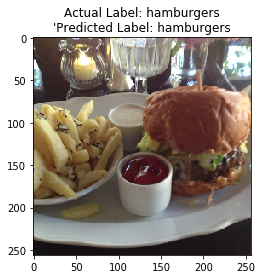

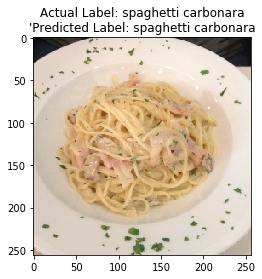

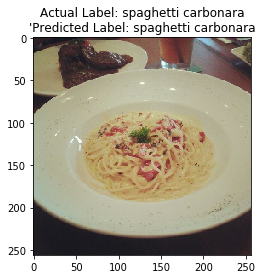

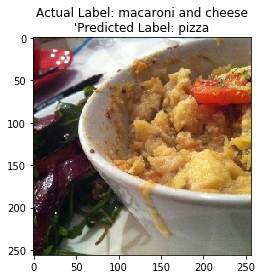

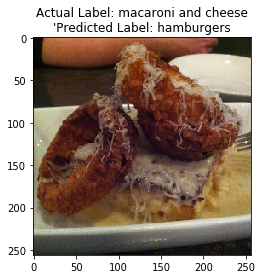

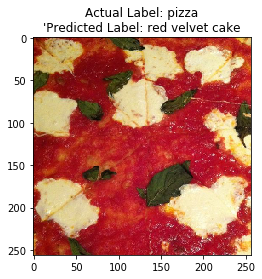

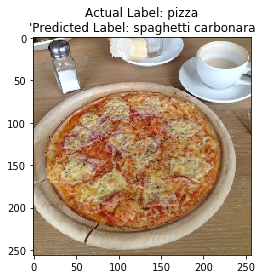

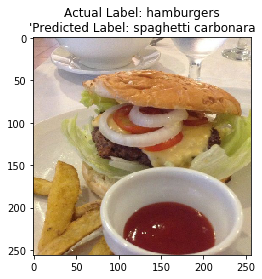

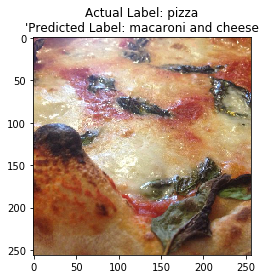

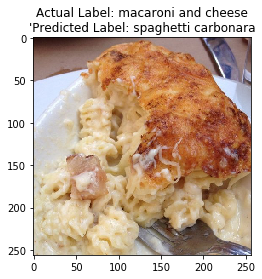

In [0]:
for _ in range(10):
    i = np.random.choice(range(len(rf_test_images)))
    test_img = rf_test_images[i].reshape(256, 256, 3)
    test_label = labels[rf_test_labels[i]]
    test_predict = labels[test_hat[i]]

    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.title("Actual Label: {}\n'Predicted Label: {}".format(test_label, test_predict))
    plt.imshow(test_img)
    plt.show()

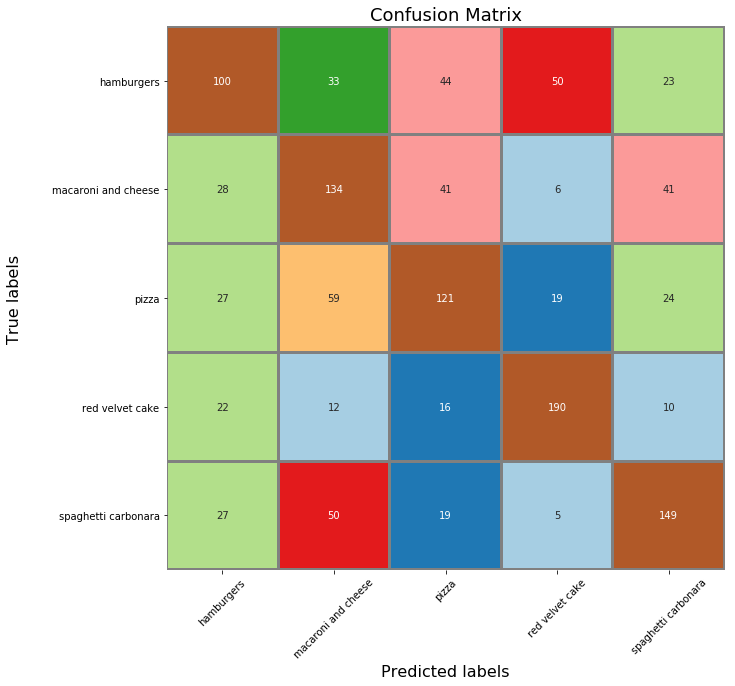

In [0]:
# Calculate Confusion Matrix
cm = confusion_matrix(rf_test_labels, test_hat)

# Figure adjustment and heatmap plot
f = plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, vmax=100, cbar=False, cmap='Paired', mask=(cm==0), fmt=',.0f', linewidths=2, linecolor='grey', ); 

# labels
ax.set_xlabel('Predicted labels', fontsize=16);
ax.set_ylabel('True labels', labelpad=30, fontsize=16); 
ax.set_title('Confusion Matrix', fontsize=18); 
ax.xaxis.set_ticklabels(labels, rotation=45); 
ax.yaxis.set_ticklabels(labels, rotation=0);

In [0]:
from sklearn.metrics import classification_report
print(classification_report(rf_test_labels, test_hat))

              precision    recall  f1-score   support

           0       0.49      0.40      0.44       250
           1       0.47      0.54      0.50       250
           2       0.50      0.48      0.49       250
           3       0.70      0.76      0.73       250
           4       0.60      0.60      0.60       250

    accuracy                           0.56      1250
   macro avg       0.55      0.56      0.55      1250
weighted avg       0.55      0.56      0.55      1250



In [0]:
# clear memory
rf_train_images = None
rf_train_labels = None

rf_test_images = None
rf_test_labels = None

# CNN

In [0]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, ReduceLROnPlateau
from keras.metrics import top_k_categorical_accuracy

import argparse
import random
import pickle

import os

In [0]:
# CONV => RELU => POOL
cnn = Sequential()
inputShape = (224, 224, 3)
chanDim = -1
classes=101


cnn.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
cnn.add(BatchNormalization(axis=chanDim))
cnn.add(MaxPooling2D(pool_size=(3, 3)))
cnn.add(Dropout(rate=0.25))

cnn.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
cnn.add(BatchNormalization(axis=chanDim))

cnn.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
cnn.add(BatchNormalization(axis=chanDim))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(rate=0.25))

cnn.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
cnn.add(BatchNormalization(axis=chanDim))

cnn.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
cnn.add(BatchNormalization(axis=chanDim))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(rate=0.25))

cnn.add(Flatten())
cnn.add(Dense(1024, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(rate=0.5))

# softmax classifier
cnn.add(Dense(classes, activation='softmax'))


W0729 00:35:57.428443 139825486243712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 00:35:57.444764 139825486243712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 00:35:57.447617 139825486243712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0729 00:35:57.479163 139825486243712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0729 00:35:57.480497 1398254862

In [0]:
import functools


INIT_LR = 1e-2


opt = SGD(lr=INIT_LR, momentum=0.9)



def schedule(epoch):
  if epoch<100:
    return 1e-2
  elif epoch<200:
    return 5e-3
  else:
    return 5e-4

learningrate_scheduler = LearningRateScheduler(schedule)


import functools

top10_acc = functools.partial(top_k_categorical_accuracy, k=10)

top10_acc.__name__ = 'top10_acc'


top3_acc = functools.partial(top_k_categorical_accuracy, k=3)

top3_acc.__name__ = 'top3_acc'


cnn.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy", top3_acc, top10_acc])


# create checkpoint file, verbose display of saving, keep best checkpoint 
checkpoint = ModelCheckpoint(filepath='./drive/My Drive/FoodModels/modelcnn_20190722.hdf5', monitor='val_acc', verbose=1, save_best_only=True)

csv_logger = CSVLogger('./drive/My Drive/FoodModels/modelcnn.log')

W0729 00:36:01.858790 139825486243712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 74, 74, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 74, 74, 64)        36928     
__________

In [0]:
cnn.load_weights(filepath='./drive/My Drive/FoodModels/modelcnn_20190722.hdf5')

In [0]:
import sys

sys.getsizeof(cnn)

56

In [0]:
from keras.utils.data_utils import get_file
weights_path = get_file(
             './weights.hdf5',
            'https://grubguesser.s3.us-east-2.amazonaws.com/modelcnn_20190722.hdf5')
cnn.load_weights(weights_path)

342917120/342912196 [==============================] - 3s 0us/step


In [0]:
start_from = 100

cnn_history = cnn.fit_generator(data_train, 
                                steps_per_epoch=200,
                                epochs=200, 
                                validation_data=data_test, 
                                validation_steps=250,
                                verbose=1,
                                callbacks=[learningrate_scheduler, csv_logger, checkpoint], 
                                initial_epoch=start_from)



# cnn_history = cnn.fit(x=images_train, y=labels_train, 
#                       epochs=EPOCHS, batch_size=BS, 
#                       validation_split=0.2)

Epoch 101/200
200/200 [==============================] - 346s 2s/step - loss: 1.6303 - acc: 0.5687 - top10_acc: 0.9075 - val_loss: 2.1354 - val_acc: 0.4954 - val_top10_acc: 0.8723

Epoch 00101: val_acc improved from -inf to 0.49545, saving model to ./drive/My Drive/FoodModels/modelcnn_20190722.hdf5
Epoch 102/200
200/200 [==============================] - 329s 2s/step - loss: 1.6320 - acc: 0.5693 - top10_acc: 0.9063 - val_loss: 2.0991 - val_acc: 0.5043 - val_top10_acc: 0.8722

Epoch 00102: val_acc improved from 0.49545 to 0.50432, saving model to ./drive/My Drive/FoodModels/modelcnn_20190722.hdf5
Epoch 103/200
200/200 [==============================] - 326s 2s/step - loss: 1.6321 - acc: 0.5640 - top10_acc: 0.9057 - val_loss: 2.1337 - val_acc: 0.4945 - val_top10_acc: 0.8698

Epoch 00103: val_acc did not improve from 0.50432
Epoch 104/200
200/200 [==============================] - 324s 2s/step - loss: 1.6430 - acc: 0.5641 - top10_acc: 0.9047 - val_loss: 1.9225 - val_acc: 0.5322 - val_top1

KeyboardInterrupt: ignored

In [0]:
%%time

cnn.evaluate_generator(data_test, steps=250)


CPU times: user 2min, sys: 9.47 s, total: 2min 10s
Wall time: 1min 59s


[1.9299298682212829,
 0.5304950606822968,
 0.7262178285121917,
 0.8890693049430847]

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
%%time
all_test_pred = []
all_test_actual = []

for i in range(250):
  sample_test_data, sample_test_labels = next(data_test)
  sample_pred = cnn.predict_classes(sample_test_data)
  all_test_pred.extend(sample_pred)
  all_test_actual.extend(sample_test_labels.argmax(axis=1))
  

CPU times: user 2min 3s, sys: 10.5 s, total: 2min 14s
Wall time: 2min 49s


In [0]:
print(classification_report(all_test_actual, all_test_pred, target_names=labels))

                         precision    recall  f1-score   support

              Apple pie       0.34      0.23      0.27       249
         Baby back ribs       0.59      0.43      0.50       249
                Baklava       0.45      0.67      0.53       250
         Beef carpaccio       0.69      0.70      0.70       252
           Beef tartare       0.46      0.57      0.51       250
             Beet salad       0.69      0.43      0.53       250
               Beignets       0.31      0.73      0.44       252
               Bibimbap       0.85      0.72      0.78       250
          Bread pudding       0.43      0.32      0.37       250
      Breakfast burrito       0.48      0.12      0.19       249
             Bruschetta       0.44      0.45      0.45       251
           Caesar salad       0.53      0.81      0.64       253
                Cannoli       0.52      0.31      0.39       251
          Caprese salad       0.59      0.59      0.59       251
            Carrot cake 

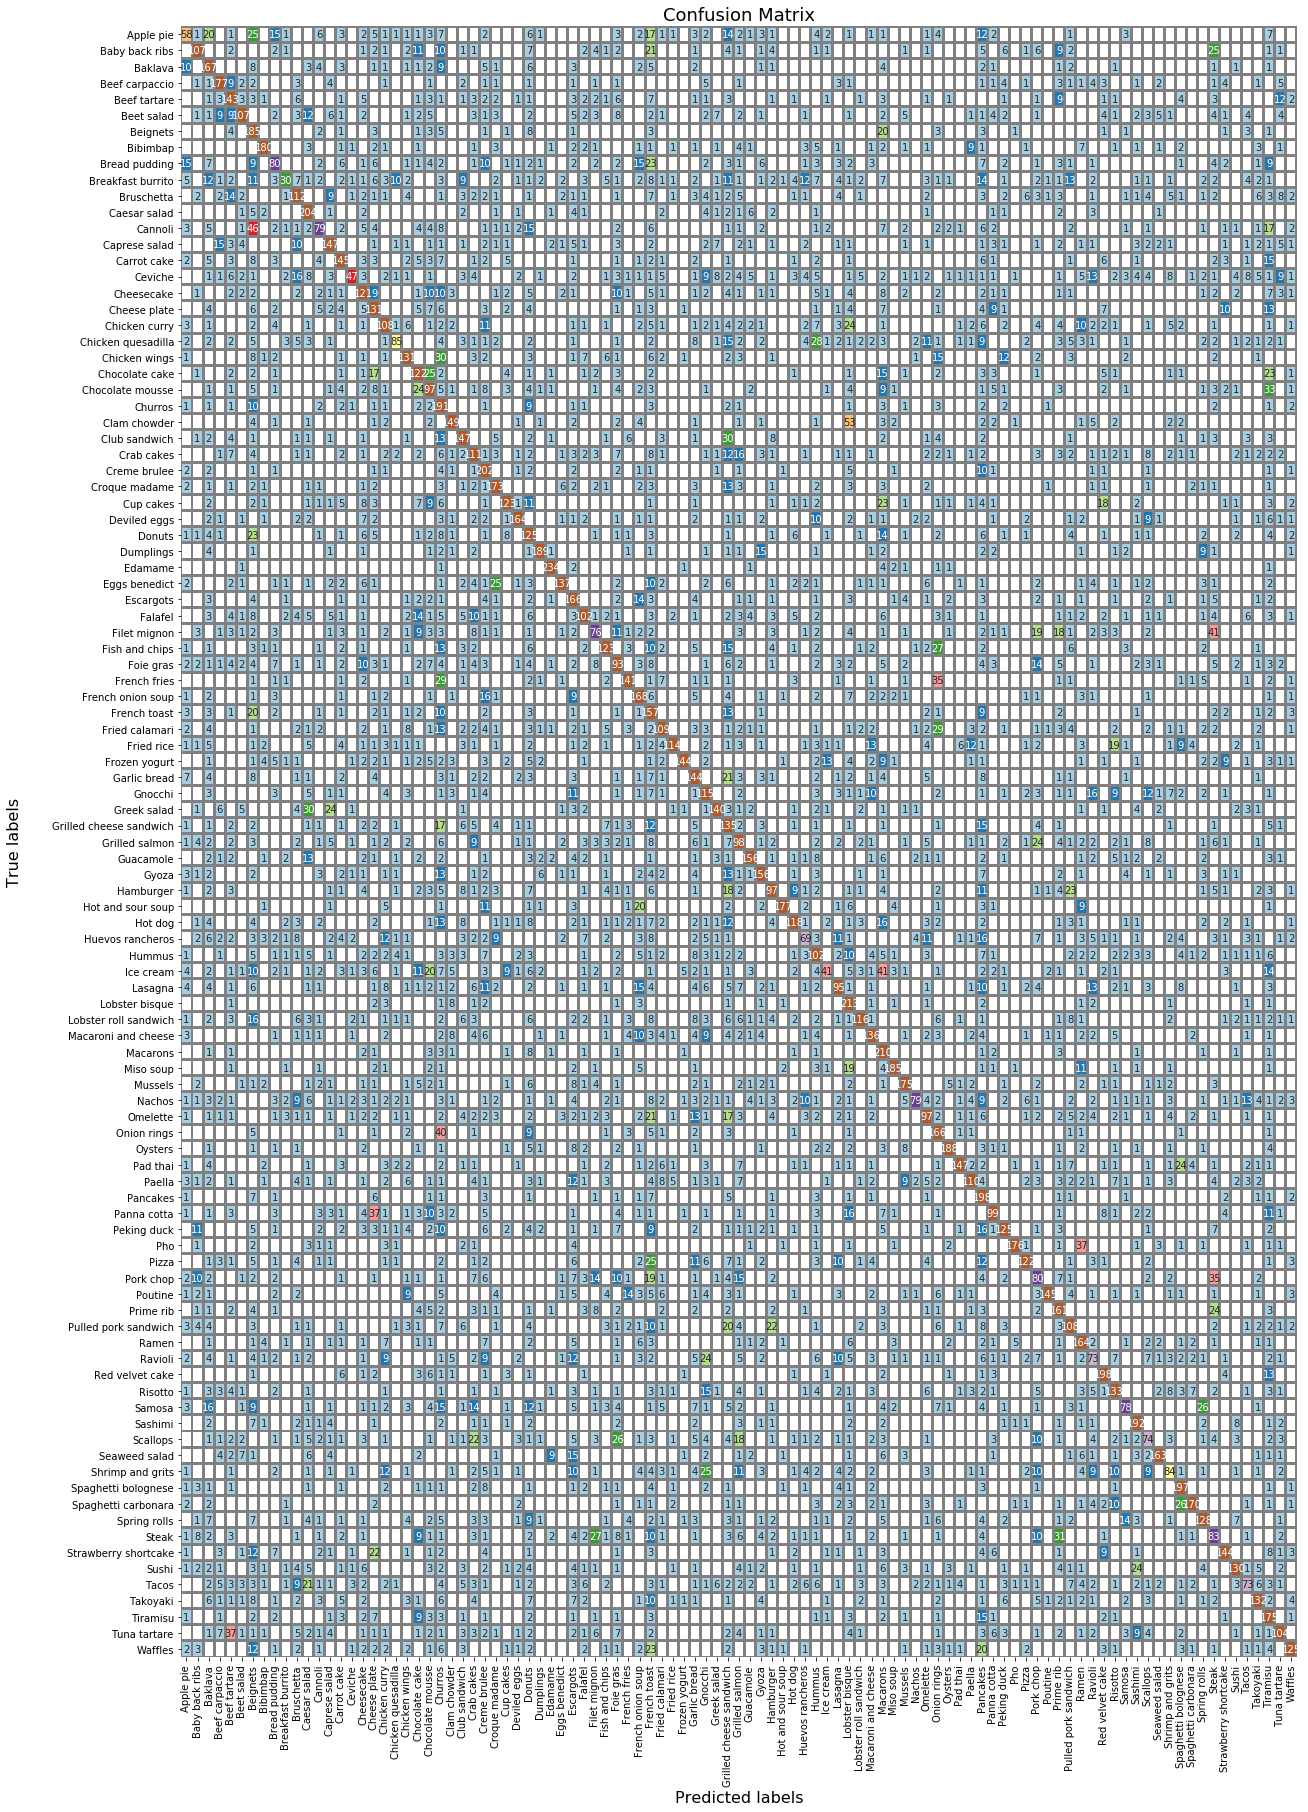

In [0]:
# Calculate Confusion Matrix
cm = confusion_matrix(all_test_actual, all_test_pred)

# Figure adjustment and heatmap plot
f = plt.figure(figsize=(20,30))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, vmax=100, cbar=False, cmap='Paired', mask=(cm==0), fmt=',.0f', linewidths=2, linecolor='grey', ); 

# labels
ax.set_xlabel('Predicted labels', fontsize=16);
ax.set_ylabel('True labels', labelpad=30, fontsize=16); 
ax.set_title('Confusion Matrix', fontsize=18); 
ax.xaxis.set_ticklabels(labels, rotation=90); 
ax.yaxis.set_ticklabels(labels, rotation=0);
ax.set_facecolor('white')

In [0]:
# Save model structure to json

model_json = cnn.to_json()
with open('./drive/My Drive/FoodModels/cnn.json', 'w') as json_file:
  json_file.write(model_json)

# Optimize Model for Production

In [0]:
!pip uninstall -yq tensorflow
!pip uninstall -yq tf-nightly
!pip install -Uq tf-nightly-gpu
!pip install -q tensorflow-model-optimization

     |████████████████████████████████| 406.6MB 78kB/s 
     |████████████████████████████████| 4.1MB 29.2MB/s 
     |████████████████████████████████| 501kB 41.6MB/s 
     |████████████████████████████████| 61kB 14.7MB/s 


In [0]:
!pip install --user --upgrade tensorflow-model-optimization

Requirement already up-to-date: tensorflow-model-optimization in /usr/local/lib/python3.6/dist-packages (0.1.2)


In [0]:
import tensorflow_model_optimization as tfmot
from tensorflow_model_optimization.sparsity import keras as sparsity


num_train_samples = 75750
batch_size = 101

epochs = 4
end_step = np.ceil(1.0 * num_train_samples / batch_size).astype(np.int32) * epochs
print(end_step)

new_pruning_params = {
      'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity=0.50,
                                                   final_sparsity=0.90,
                                                   begin_step=0,
                                                   end_step=end_step,
                                                   frequency=100)
}


new_pruned_model = sparsity.prune_low_magnitude(cnn, **new_pruning_params)
new_pruned_model.summary()

new_pruned_model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy'])




3000


AttributeError: ignored

In [0]:
type(cnn)

keras.engine.sequential.Sequential

# Transfer Learning

## Inception_V3

In [0]:
from keras.applications import inception_v3
from keras.layers import Dense,GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, f1_score
from keras.models import Model

In [0]:
imagenet=inception_v3.InceptionV3(weights='imagenet',include_top=False, input_shape=(224,224,3)
imagenet_new=imagenet.output
inception_model = models.Sequential()
inception_model.add(imagenet)

inception_model.add(MaxPooling2D(pool_size=(2, 2)))
inception_model.add(Dropout(rate=0.25))

inception_model.add(Flatten())
inception_model.add(Dense(1024, activation='relu'))
inception_model.add(BatchNormalization())
inception_model.add(Dropout(rate=0.5))
inception_model.add(Dense(101,activation='softmax')) #final layer with softmax activation




W0724 15:04:35.019076 139670507706240 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
for layer in inception_model.layers[:1]:
    layer.trainable=False

In [0]:
for i,layer in enumerate(imagenet.layers):
  print(i,layer.name, layer.trainable)

0 input_2 False
1 conv2d_95 True
2 batch_normalization_95 True
3 activation_95 True
4 conv2d_96 True
5 batch_normalization_96 True
6 activation_96 True
7 conv2d_97 True
8 batch_normalization_97 True
9 activation_97 True
10 max_pooling2d_5 True
11 conv2d_98 True
12 batch_normalization_98 True
13 activation_98 True
14 conv2d_99 True
15 batch_normalization_99 True
16 activation_99 True
17 max_pooling2d_6 True
18 conv2d_103 True
19 batch_normalization_103 True
20 activation_103 True
21 conv2d_101 True
22 conv2d_104 True
23 batch_normalization_101 True
24 batch_normalization_104 True
25 activation_101 True
26 activation_104 True
27 average_pooling2d_10 True
28 conv2d_100 True
29 conv2d_102 True
30 conv2d_105 True
31 conv2d_106 True
32 batch_normalization_100 True
33 batch_normalization_102 True
34 batch_normalization_105 True
35 batch_normalization_106 True
36 activation_100 True
37 activation_102 True
38 activation_105 True
39 activation_106 True
40 mixed0 True
41 conv2d_110 True
42 batch_

In [0]:
inception_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 2048)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 2048)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              8389632   
_________________________________________________________________
batch_normalization_189 (Bat (None, 1024)              4096      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
__________

In [0]:
for i,layer in enumerate(inception_model.layers):
  print(i,layer.name, layer.trainable)

0 inception_v3 False
1 max_pooling2d_9 True
2 dropout_1 True
3 flatten_1 True
4 dense_1 True
5 batch_normalization_189 True
6 dropout_2 True
7 dense_2 True


In [0]:
import functools


INIT_LR = 1e-2


top10_acc = functools.partial(top_k_categorical_accuracy, k=10)
top10_acc.__name__ = 'top10_acc'

opt = Adam(lr=INIT_LR)
inception_model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy", top10_acc])


# create checkpoint file, verbose display of saving, keep best checkpoint 
checkpoint_inception = ModelCheckpoint(filepath='./drive/My Drive/FoodModels/modelincept_20190723.hdf5', monitor='val_acc', verbose=1, save_best_only=True)

csv_logger_inception = CSVLogger('./drive/My Drive/FoodModels/modelincept.log')

W0724 15:05:03.932897 139670507706240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
inception_model.load_weights('./drive/My Drive/FoodModels/modelincept_20190723.hdf5')

In [0]:
start_from = 109
# 7/24 - 9:02 AM ended at 109 epochs
inception_history = inception_model.fit_generator(data_train, 
                                            steps_per_epoch=200,
                                            epochs=200, 
                                            validation_data=data_test, 
                                            validation_steps=250,
                                            verbose=1,
                                            callbacks=[csv_logger_inception, checkpoint_inception], 
                                            initial_epoch=start_from)

W0724 15:05:25.257496 139670507706240 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 110/200
153/200 [=====================>........] - ETA: 1:02 - loss: 2.7612 - acc: 0.3430 - top10_acc: 0.7298

KeyboardInterrupt: ignored

## Resnet 

In [0]:
# 

In [0]:
import requests

In [0]:
model_save = requests.get('https://grubguesser.s3.us-east-2.amazonaws.com/modelcnn_20190722.hdf5')

In [0]:
img_path = './food-101/images/donuts/'
img_list = os.listdir(img_path)

In [0]:
rnd_img = np.random.choice(img_list)

In [0]:
rnd_img

'3126988.jpg'

--------------------------------------------------


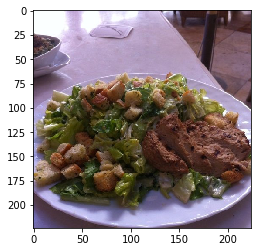

Top 10 guesses: ['Caesar salad', 'Steak', 'Prime rib', 'Escargots', 'Filet mignon', 'Beef tartare', 'Pork chop', 'Grilled salmon', 'Crab cakes', 'Falafel']
--------------------------------------------------


In [0]:
img_path = './food-101/images/caesar_salad/'
img_list = os.listdir(img_path)
rnd_img = np.random.choice(img_list)

print('-'*50)
test_img = img_to_array(load_img(img_path + rnd_img, target_size=(224,224))) / 255.
plt.imshow(test_img)
plt.show()
x = np.array([test_img])
class_prob = cnn.predict(x)
top_values_index = (-class_prob).argsort()[0][:10]
print('Top 10 guesses: {}'.format([labels[i] for i in top_values_index]))
print('-'*50)

In [0]:
print(labels)

['Apple pie', 'Baby back ribs', 'Baklava', 'Beef carpaccio', 'Beef tartare', 'Beet salad', 'Beignets', 'Bibimbap', 'Bread pudding', 'Breakfast burrito', 'Bruschetta', 'Caesar salad', 'Cannoli', 'Caprese salad', 'Carrot cake', 'Ceviche', 'Cheesecake', 'Cheese plate', 'Chicken curry', 'Chicken quesadilla', 'Chicken wings', 'Chocolate cake', 'Chocolate mousse', 'Churros', 'Clam chowder', 'Club sandwich', 'Crab cakes', 'Creme brulee', 'Croque madame', 'Cup cakes', 'Deviled eggs', 'Donuts', 'Dumplings', 'Edamame', 'Eggs benedict', 'Escargots', 'Falafel', 'Filet mignon', 'Fish and chips', 'Foie gras', 'French fries', 'French onion soup', 'French toast', 'Fried calamari', 'Fried rice', 'Frozen yogurt', 'Garlic bread', 'Gnocchi', 'Greek salad', 'Grilled cheese sandwich', 'Grilled salmon', 'Guacamole', 'Gyoza', 'Hamburger', 'Hot and sour soup', 'Hot dog', 'Huevos rancheros', 'Hummus', 'Ice cream', 'Lasagna', 'Lobster bisque', 'Lobster roll sandwich', 'Macaroni and cheese', 'Macarons', 'Miso sou